In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline

In [2]:
df_train = pd.read_csv("./train_energy_data.csv")
df_test = pd.read_csv("./test_energy_data.csv")
df_train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


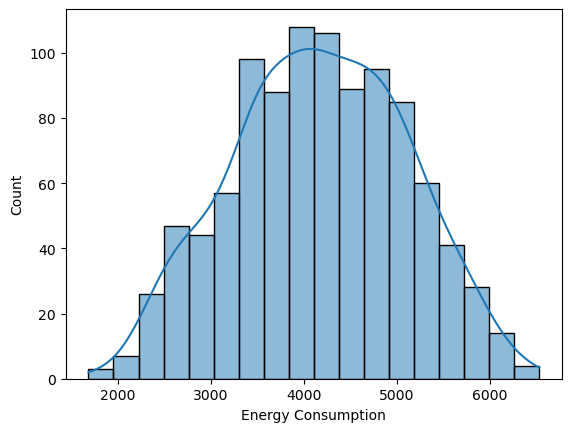

In [4]:
sns.histplot(df_train["Energy Consumption"],kde=True)
plt.show()

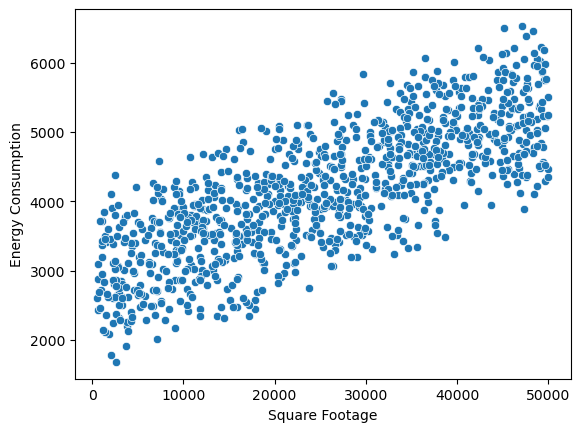

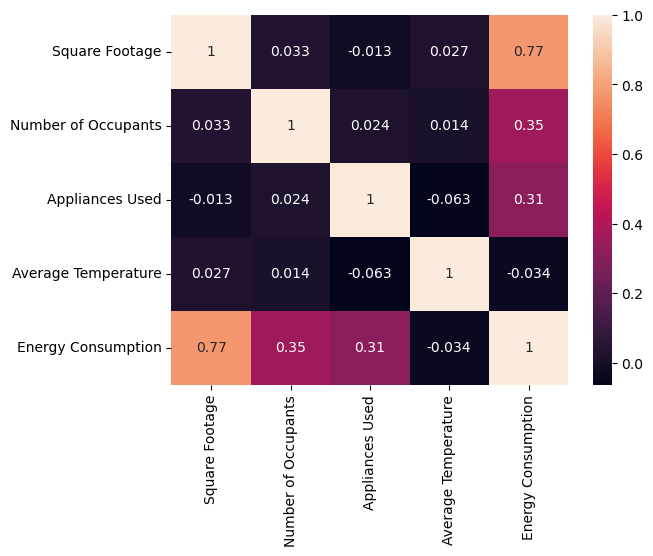

In [5]:
sns.scatterplot(x=df_train["Square Footage"],y=df_train["Energy Consumption"])
plt.show()

sns.heatmap(data=df_train.corr(numeric_only=True),annot=True)
plt.show()

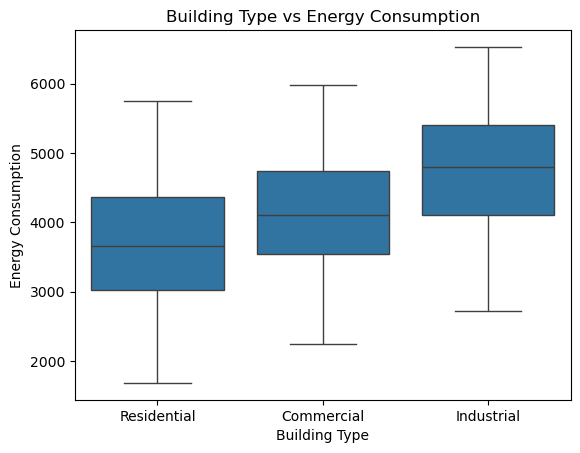

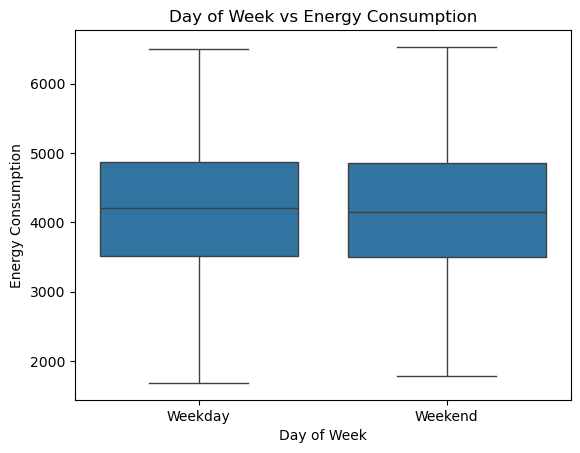

In [6]:
sns.boxplot(x='Building Type', y='Energy Consumption', data=df_train)
plt.title('Building Type vs Energy Consumption')
plt.show()

sns.boxplot(x='Day of Week', y='Energy Consumption', data=df_train)
plt.title('Day of Week vs Energy Consumption')
plt.show()

In [7]:
df_train.shape

(1000, 7)

In [10]:
df_train_encoded  = pd.get_dummies(data=df_train,columns=["Building Type"],drop_first=True)
df_train_encoded

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption,Building Type_Industrial,Building Type_Residential
0,7063,76,10,29.84,Weekday,2713.95,False,True
1,44372,66,45,16.72,Weekday,5744.99,False,False
2,19255,37,17,14.30,Weekend,4101.24,True,False
3,13265,14,41,32.82,Weekday,3009.14,False,True
4,13375,26,18,11.92,Weekday,3279.17,False,False
...,...,...,...,...,...,...,...,...
995,14419,68,44,23.95,Weekend,3661.21,False,True
996,12194,7,22,14.67,Weekend,3546.34,True,False
997,39562,88,20,32.18,Weekday,5147.21,False,False
998,8348,67,37,16.48,Weekend,3244.98,False,True


In [11]:
df_train_encoded = pd.get_dummies(data=df_train_encoded,columns=["Day of Week"],drop_first=True)
df_train_encoded

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,7063,76,10,29.84,2713.95,False,True,False
1,44372,66,45,16.72,5744.99,False,False,False
2,19255,37,17,14.30,4101.24,True,False,True
3,13265,14,41,32.82,3009.14,False,True,False
4,13375,26,18,11.92,3279.17,False,False,False
...,...,...,...,...,...,...,...,...
995,14419,68,44,23.95,3661.21,False,True,True
996,12194,7,22,14.67,3546.34,True,False,True
997,39562,88,20,32.18,5147.21,False,False,False
998,8348,67,37,16.48,3244.98,False,True,True


In [13]:
df_train.corr(numeric_only=True)

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
Square Footage,1.000000,0.033379,-0.013478,0.027273,0.774873
Number of Occupants,0.033379,1.000000,0.023646,0.014122,0.354485
Appliances Used,-0.013478,0.023646,1.000000,-0.062870,0.312792
Average Temperature,0.027273,0.014122,-0.062870,1.000000,-0.034487
Energy Consumption,0.774873,0.354485,0.312792,-0.034487,1.000000


In [14]:
df_test_encoded = pd.get_dummies(data=df_test,columns=["Building Type"],drop_first=True)
df_test_encoded

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption,Building Type_Industrial,Building Type_Residential
0,24563,15,4,28.52,Weekday,2865.57,False,True
1,27583,56,23,23.07,Weekend,4283.80,False,False
2,45313,4,44,33.56,Weekday,5067.83,False,False
3,41625,84,17,27.39,Weekend,4624.30,False,True
4,36720,58,47,17.08,Weekday,4820.59,False,True
...,...,...,...,...,...,...,...,...
95,1161,81,11,15.45,Weekend,3010.81,False,False
96,37943,50,23,21.73,Weekend,4248.49,False,True
97,1558,27,29,16.86,Weekend,2843.60,False,False
98,2145,56,12,11.77,Weekend,3348.39,True,False


In [15]:
df_test_encoded = pd.get_dummies(data=df_test_encoded,columns=["Day of Week"],drop_first=True)
df_test_encoded

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,24563,15,4,28.52,2865.57,False,True,False
1,27583,56,23,23.07,4283.80,False,False,True
2,45313,4,44,33.56,5067.83,False,False,False
3,41625,84,17,27.39,4624.30,False,True,True
4,36720,58,47,17.08,4820.59,False,True,False
...,...,...,...,...,...,...,...,...
95,1161,81,11,15.45,3010.81,False,False,True
96,37943,50,23,21.73,4248.49,False,True,True
97,1558,27,29,16.86,2843.60,False,False,True
98,2145,56,12,11.77,3348.39,True,False,True


In [38]:
for col in df_train_encoded.columns:
    df_train_encoded[col] = df_train_encoded[col].astype(int)

for col in df_test_encoded.columns:
    df_train_encoded[col] = df_train_encoded[col].astype(int)

df_train_encoded

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,7063,76,10,29,2713,0,1,0
1,44372,66,45,16,5744,0,0,0
2,19255,37,17,14,4101,1,0,1
3,13265,14,41,32,3009,0,1,0
4,13375,26,18,11,3279,0,0,0
...,...,...,...,...,...,...,...,...
995,14419,68,44,23,3661,0,1,1
996,12194,7,22,14,3546,1,0,1
997,39562,88,20,32,5147,0,0,0
998,8348,67,37,16,3244,0,1,1


In [39]:
reg = LinearRegression()

In [40]:
scaler = StandardScaler()

In [45]:
X_train = df_train_encoded[[column for column in df_train_encoded.columns if column != "Energy Consumption"]]
y_train = df_train_encoded["Energy Consumption"]

In [46]:
X_test = df_test_encoded[[col for col in df_test_encoded.columns if col != "Energy Consumption"]]
y_test = df_test_encoded["Energy Consumption"]

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
reg.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = reg.predict(X_test)

In [51]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE: ",mse)
print("MAE: ",mae)
print("R2 Score: ",r2)

MSE:  9.228355738785911
MAE:  3.0352393766379326
R2 Score:  0.9999865519843187


In [52]:
!pip install lazypredict

In [53]:
from lazypredict.Supervised import LazyRegressor

lazy_reg = LazyRegressor()
models, preds = lazy_reg.fit(X_train,X_test,y_train,y_test)

print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

/home/emre/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 7
[LightGBM] [Info] Start training from score 4165.760000
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
LarsCV                                       1.00       1.00    3.04   
Lars                                         1.00       1.00    3.04   
LassoLarsCV                                  1.00       1.00    3.04   
TransformedTargetRegressor                   1.00       1.00    3.04   
RANSACRegressor                              1.00       1.00    3.04   
LinearRegression                             1.00       1.00    3.04   
LassoLarsIC                                  1.00       1.00    3.04   
BayesianRi

/home/emre/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
